# CPS600 - Python Programming for Finance 
###  
<img src="https://www.syracuse.edu/wp-content/themes/g6-carbon/img/syracuse-university-seal.svg?ver=6.3.9" style="width: 200px;"/>

## Clustering and Classification

###  November 13, 2018

Let's illustrate some of the ideas of classification that we saw in the slides last week.

*Logistic Regression*

We wish to maximize the *likelihood*. But how do we model it?

$ P(C_k \mid {\bf X})$

Remeber the *sigmoid* function?

In [1]:
import numpy as np
from bokeh.plotting import figure, output_notebook, show
output_notebook()
sgmd = lambda x: 1 / (1 + np.exp(-x))
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = sgmd(x)
p = figure(plot_width=400, plot_height=400)
p.line(x,y)
show(p)

Loading BokehJS ...

Note the *domain* and *codomain*. The sigmoid function can take any input and returns a value between $0$ and $1$. This means we can use any discriminant function we like and feed its output into the sigmoid. You can think of the output of the sigmoid as a probability.

A more readable expression for the *logistic* sigmoid:

## $\sigma(a) = \frac{1}{1 + e^{-a}}$

Given data $\bf X$ and weights $\color{blue}{W}$, we compute the dot product $\color{blue}{W} \cdot \bf X$ and feed the result into the sigmoid function. This is a simple *GLM*, or *Generalized Linear Model*. The model is this:

## $P(C_k \mid {\bf X}) = \sigma(\color{blue}{W} \cdot {\bf X}) = \sigma(\langle \color{blue}{W}, {\bf X}\rangle) = \sigma (\sum_{i=1}^d \color{blue}{W}_i X_i)$

Remember from before that the weights $\color{blue}{W}$ are really the optimization variables. In this case, the mathematical optimization can be done via *iterative reweighted least squares* (IRLS). But what on Earth are we optimizing? We are actually *maximizing* the likelihood of the parameters given the data. We find the $\color{blue}{W}$ (a vector), which maximizes this:

## $ P( {\bf t} \mid \color{blue}{W} ) = \prod_{n=1}^N y_n^{t_n}(1 - y_n)^{1-t_n}$

where ${\bf t} = (t_1,\ldots,t_N)$ are the *labels* from the training set (i.e. $t_n \in \{0,1\}$) and $y_n = P(C_1 \mid x_n) = \sigma(\color{blue}{W} \cdot x_n)$ are the probabilities predicted by the model with weights $\color{blue}{W}$.

We are left with a model that takes $\bf X$ as input and outputs a value $\sigma(\color{blue}{W} \cdot {\bf X}) \in (0,1)$. In the case of two-class classification, this can be interpreted as the probability that the datapoint $\bf X$ belongs to class $C_1$.

Let's look at an example.

In [2]:
# For random points
import numpy as np

# Plotting using Bokeh
from bokeh.plotting import figure, show, output_notebook

# Show in notebook.
output_notebook()

# Build a figure
p = figure(title="Bokeh Markers", toolbar_location=None)
p.grid.grid_line_color = None
p.background_fill_color = "#eeeeee"

def mscatter(p, x, y, marker, fill):
    p.scatter(x, y, marker=marker, size=15,
              line_color="navy", fill_color=fill, alpha=0.5)

# Number of datapoints
N = 100

# First cluster
X1 = np.random.random(100)
Y1 = np.random.random(100)

# Second Cluster
X2 = np.random.random(100) - 1/2
Y2 = np.random.random(100) + 1/2
    
# Throw in clusters
mscatter(p, X1, Y1, "circle", "blue")
mscatter(p, X2, Y2, "square", "orange")

# # A line separating them
# X = np.linspace(-2,2,100)
# Y = 2*X**2
# p.line(X,Y, line_color='red')
show(p)

Loading BokehJS ...

Let's go ahead and build a classification model.

In [3]:
# This is just ML magic
from sklearn import linear_model

# Create a logistic regression object
logreg = linear_model.LogisticRegression()

# Combine all data
X = np.append(X1,X2) # X-coords mashed together
Y = np.append(Y1,Y2) # Y-coords mashed together
features = np.array([X,Y]).transpose() # All data in an array, transposed for the right shape

# Create labels
T = 100*[1] + 100*[0] # Label ordering is important

# Train the model
logreg.fit(features,T)

/home/muveexu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Now we must grab the predicted probabilities. Let's do it on new data.

In [4]:
features.shape, len(T)

((200, 2), 200)

In [5]:
# First cluster
X1 = np.random.random(100)
Y1 = np.random.random(100)

# Second Cluster
X2 = np.random.random(100) - 1/2
Y2 = np.random.random(100) + 1/2

# Combining data
X = np.append(X1,X2)
Y = np.append(Y1,Y2)
features = np.array([X,Y]).transpose()

# (Leave labels as before)

# Run the model on our new data...

# Mini-Exercise:

# We are predicting probabilities.
# Search LogisticRegression documentation on
# the Sklearn page to see how a prediction is made.

pred = logreg.predict_proba(features)

# This function computes the p-r values for us
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(T,pred[:,1])

*Precision-Recall Curve*

Now, let's look at a precision-recall curve for our classifier.

In [6]:
p1 = figure(plot_width=400, plot_height=400)
p1.line(recall,precision)
show(p1)

In [7]:
pred[:,1]

array([0.43040771, 0.98603301, 0.91520597, 0.69686225, 0.37053752,
       0.81990281, 0.88519692, 0.80923744, 0.48957474, 0.97213997,
       0.96231493, 0.94394524, 0.95786128, 0.94451945, 0.64696752,
       0.64026358, 0.88900843, 0.9787755 , 0.98034312, 0.96430476,
       0.75562547, 0.92195873, 0.76436733, 0.74847164, 0.7258972 ,
       0.69470476, 0.98696644, 0.98391376, 0.97912577, 0.9175177 ,
       0.81415595, 0.96404548, 0.76569041, 0.93234831, 0.69567804,
       0.93231834, 0.84240346, 0.97608316, 0.85992926, 0.78492907,
       0.9633713 , 0.67599764, 0.63555657, 0.93187488, 0.8722605 ,
       0.65911525, 0.81429253, 0.64362777, 0.90955459, 0.92927654,
       0.7276814 , 0.76213399, 0.9680879 , 0.87772652, 0.74507345,
       0.74863925, 0.7517738 , 0.90287763, 0.96295725, 0.66541689,
       0.91272384, 0.36662146, 0.88635805, 0.64952458, 0.89970186,
       0.50256112, 0.85465301, 0.9684464 , 0.85391187, 0.92341937,
       0.98907133, 0.94523652, 0.9302732 , 0.43345605, 0.85926

The method `roc_curve` from `sklearn.metrics` provides the data for the [roc curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic).

**Kernel Trick**

Next, let's illustrate the so-called *kernel trick* in classification.

*SVM - Support Vector Machine*

The SVM finds a *separating hyperplane*.

We want the hyperplane that gives the widest possible margin between the two classes. If the dataset is linearly separable, here's how that works: 

We want to compute two parallel hyperplanes:
## $ H_0 = \{ x \mid \color{blue}{w} \cdot x + \color{blue}{b} \geq 1 \} $
## $ H_1 = \{ x \mid \color{blue}{w} \cdot x + \color{blue}{b} \leq -1 \} $

and we want them to be as far apart as possible subject to the constraint that all training examples lie in their union ($H_0 \cup H_1$). This amounts to *minimizing* the norm $\|w\|$.

The *decision function* that actually gives our classifier is then given by, for example

## $f_{\color{blue}{w}}(x) = sign(\color{blue}{w} \cdot x + b)$

*Linearly Inseparable*

What if we can't separate the points? Or don't want to? We can introduce *slack variables* and use regularization to relax the strict separation condition (SVC does this). We can also map into a higher dimensional space where our dataset's image *is* strictly separable!

In [8]:
# Build a figure
p = figure(title="Bokeh Markers", toolbar_location=None)
p.grid.grid_line_color = None
p.background_fill_color = "#eeeeee"

# Number of datapoints
N = 100

# First cluster
X1 = np.linspace(-2,2,100)
Y1 = (2*X1**2 - 2) + np.random.random(100)

# Second Cluster
X2 = np.random.random(100) - 1/2
Y2 = np.random.random(100) + 1
    
# Throw in clusters
mscatter(p, X1, Y1, "circle", "blue")
mscatter(p, X2, Y2, "square", "orange")

# A line separating them
X = np.linspace(-2,2,100)
Y = 2*X**2
p.line(X,Y, line_color='red')


show(p)

The $\color{red}{line}$ is a parabola. We can 'straighten' it out using the mapping $(x,y) \mapsto (x,x^2, y)$.

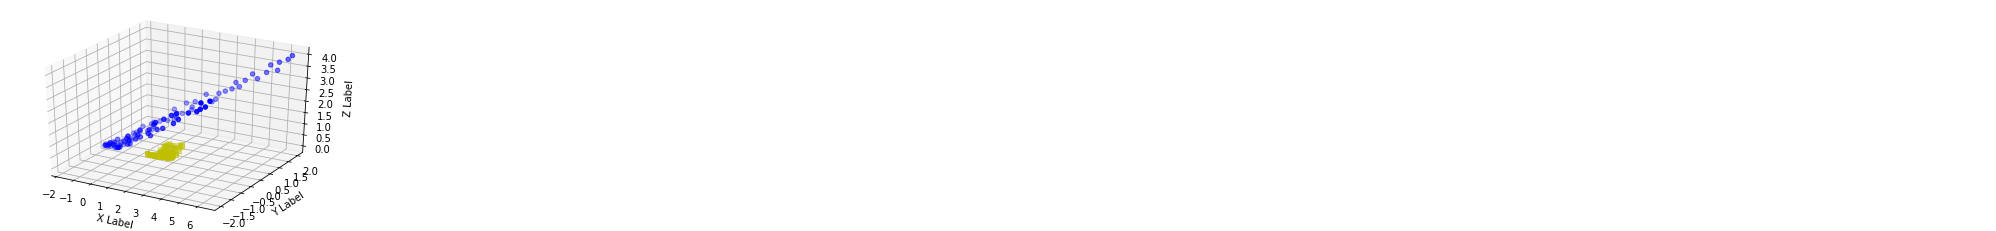

In [9]:
# Import numpy tools for 3d plotting
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib inline
# Create figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# mplot's own scatter plot function
ax.scatter(Y1,X1,X1**2,c='b',marker='o')
ax.scatter(Y2, X2, X2**2,c='y',marker='s')

# Left this here in case you want to play
# with labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the plot
plt.show()

This was just to illustrate what's going on. In general, you will certainly not be plotting the data in a higher-dimensional space, nor even mapping it.

Instead of using the mapping $(x,y) \mapsto (x, x^2, y)$ and then taking dot products $(x,y,z) \cdot (w_1, w_2, w_3)$, we can use a *kernel function* $K({\bf x}, {\bf y})$ that measures *similarity* of two datapoints ${\bf x}, {\bf y}$ directly.

*The Kernel Trick*

The final form of the *decision function* in general is

## $f_w = sign \sum y_i w_i K\big(x_i, x\big)$

*Examples of kernel functions:*
- polynomial kernel
##  $K(x_i,x_j) = (x_i \cdot x_j + 1)^h$
- Gaussian radial basis kernel
## $K(x_i,x_j) = \exp(\frac{-(x_i \cdot x_j)^2}{2\sigma^2})$

/home/muveexu/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/muveexu/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


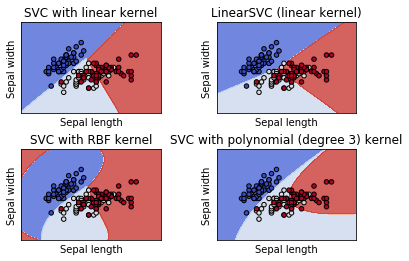

In [10]:
# Example taken from Sklearn docs.

from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# Import some data.
iris = datasets.load_iris()

# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

We want to compare classifiers numerically, since we can't always plot them and 'see' how they are doing. We will also want to turn the other knobs, called *hyperparameters*, not tuned by the learning algorithm. See [this page](http://scikit-learn.org/stable/auto_examples/svm/plot_svm_scale_c.html) for discussion of the effects of such hyperparameters in SVC performance.

**Decision Trees**

Splits are evaluated, for each feature, using the *Gini impurity*. See also *CART*.

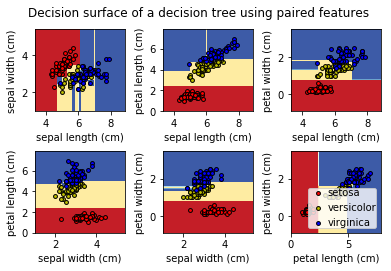

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

**$k$-Nearest Neighbors**

This next example illustrates the $k$-nearest neighbors algorithm and also is an example of *multi-class classification*.

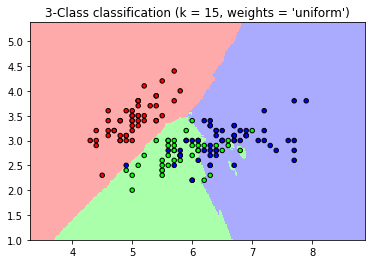

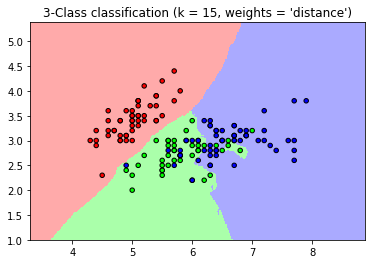

In [12]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors

n_neighbors = 15


X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

### Clustering

**Expectation-Maximization & Mixture Models**

Next, let's look a little more in-depth at the related exploratory method of *$k$-means*.

*Optimization Formulation*

> Everything is an optimization problem, yes. Realize that, and then get over it as soon as you can. (Boyd)

We have used $k$-means and discussed the algorithm. Here is the setup:

We have a dataset $\{x_1,\ldots,x_N\}$ of observations from $\mathbb{R}^D$. We seek clusters with centers $\mu_k \in \mathbb{R}^D$. *The cluster centers are the things we are choosing*. We are choosing them so that the sum of squared distances are minimized. That is, we are minimizing:

## $J = \sum_{n=1}^N\sum_{k=1}^K r_{nk} \|x_n - \mu_k\|^2$

where

## $ r_{nk} = \begin{cases} 1 & x_n \in \text{Cluster } k \\
                             0 & \text{otherwise}   \end{cases}$

The standard algorithm can be broken down into two steps

* *Expectation* - minimize $J$ wrt the $r_{nk}$, leaving $\mu_k$ fixed.

* *Maximization* - minimize $J$ wrt the $\mu_k$ leaving $r$ fixed.

(This is an instance of a more general method called EM.)

The expectation step makes the following update to the $r$ values:

## $ r_{nk} = \begin{cases} 1 & \text{ if } k= argmin_j \|x_n - \mu_j\|^2 \\
                             0 & \text{otherwise}   \end{cases}$

The maximization step is done by calculus. The partial equations

## $2\sum_{n=1}^Nr_{nk}(x_n - \mu_k) = 0$

lead to the formula for $\mu_k$

## $ \mu_k = \frac{\sum_nr_{nk}x_n}{\sum_nr_{nk}}$

Which is exactly the mean of all the things that had been assigned to cluster $k$ in the previous step.

We keep doing this until the clusters stop changing (or until a certain number of iterations has been completed.)

Let's get some data. This is a good opportunity to use what we already know. Bishop used the famous *Old Faithful* dataset. It can be found, among other places, [here](http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat). Let's pull it into our python session.

In [13]:
import numpy as np
import urllib.request
url = 'http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat'
with urllib.request.urlopen(url) as response:
    olf = response.readlines()

### Convert to strings

In [14]:
olf = [x.decode('utf-8') for x in olf]

### Strip off endline garbage

In [15]:
olf = [x.strip() for x in olf]

In [16]:
for x in olf: print(x)

Old Faithful Geyser Data

Description: (From R manual):

Waiting time between eruptions and the duration of the eruption
for the Old Faithful geyser in Yellowstone National Park, Wyoming,
USA.

A data frame with 272 observations on 2 variables.

eruptions  numeric  Eruption time in mins
waiting    numeric  Waiting time to next eruption

References:

Hardle, W. (1991) Smoothing Techniques with Implementation in S.
New York: Springer.

Azzalini, A. and Bowman, A. W. (1990). A look at some data on the
Old Faithful geyser. Applied Statistics 39, 357-365.





eruptions waiting
1       3.600      79
2       1.800      54
3       3.333      74
4       2.283      62
5       4.533      85
6       2.883      55
7       4.700      88
8       3.600      85
9       1.950      51
10      4.350      85
11      1.833      54
12      3.917      84
13      4.200      78
14      1.750      47
15      4.700      83
16      2.167      52
17      1.750      62
18      4.800      84
19      1.600      52
20

Where does the data start?

In [17]:
olf.index('eruptions waiting')

25

Where does it end?

In [18]:
olf[-1]

'272     4.467      74'

Let's put it in an array.

In [19]:
dat = [[float(y) for y in x.split()[1:]] for x in olf[26:]]
olf_mat = np.array(dat)

In [20]:
olf_mat.shape

(272, 2)

Checks out. Let's apply $k$-means to this data. We'll take $k = 2$.

First, let's initialize with random centers from our *Old Faithful* datapoints.

In [21]:
# Choosing Centers
#mu = olf_mat[[3, 5]]

mu = np.array([[2,80],[4, 50]])


# Creating r_nk, first assignment to clusters.
ar = np.zeros((len(olf_mat),2))

# Initializing r_nk
for row in range(olf_mat.shape[0]):
    dists = np.linalg.norm(row - mu, axis=1)
    smallest = min(dists)
    center = list(dists).index(smallest)
    ar[row,center] = 1

### Let's have functions to execute the two steps.

In [22]:
# This does the expectation step
def estep():
    # Make sure we're dealing with the right one
    global ar # This is dangerous! Don't use global.
    # Reset the matrix
    ar = np.zeros((len(olf_mat),2))
    for row in range(olf_mat.shape[0]):
        dists = np.linalg.norm(olf_mat[row] - mu, axis=1) # Useful little bit - broadcasting
        smallest = min(dists)
        center = list(dists).index(smallest)
        ar[row,center] = 1
        
# This does the maximization step
def mstep():
    for row in range(len(mu)):
        in_cluster = olf_mat[np.where(ar[:,row])] # Using numpy's "where" method
        mu[row] = np.sum(in_cluster,axis=0) / in_cluster.shape[0]

Let's now plot the clusters we are computing

In [23]:
from bokeh.plotting import figure, show, output_notebook
output_notebook()

mstep()
estep()


# Build a figure
p = figure(title="Old Faithful", toolbar_location=None)
p.grid.grid_line_color = None
p.background_fill_color = "#eeeeee"

def mscatter(p, x, y, marker, fill):
    p.scatter(x, y, marker=marker, size=15,
              line_color="navy", fill_color=fill, alpha=0.5)


# First cluster
C1 = olf_mat[np.where(ar[:,0])]

# Second Cluster
C2 = olf_mat[np.where(ar[:,1])]
    
# Throw in clusters
mscatter(p, C1[:,0], C1[:,1], "circle", "blue")
mscatter(p, C2[:,0], C2[:,1], "square", "orange")



show(p)

Loading BokehJS ...

*Checking Progress - plots of $J$*

Recall our cost function. Let's make it into a python function. What should it take as input?

In [24]:
def Jay(ars,m):
    total = 0
    for row in range(olf_mat.shape[0]):
        for k in range(2):
            if ar[row,k]:
                total += np.linalg.norm(olf_mat[row] - mu[k])**2
    return total

In [25]:
Jay(ar,mu)

47342.756975000055

Let's reinitialize, and then make a plot.

In [26]:
# Choosing Centers
#mu = olf_mat[[3, 5]]

mu = np.array([[2,80],[4, 50]])


# Creating r_nk
ar = np.zeros((len(olf_mat),2))

# Initializing r_nk
for row in range(olf_mat.shape[0]):
    dists = np.linalg.norm(row - mu, axis=1)
    smallest = min(dists)
    center = list(dists).index(smallest)
    ar[row,center] = 1

In [27]:
# Build a figure
f = figure(title="Cost Function J", toolbar_location=None)
f.grid.grid_line_color = None
f.background_fill_color = "#eeeeee"

# X and Y coords
X, Y = range(4),[]

for i in X:
    mstep()
    estep()
    Y.append(Jay(ar,mu))

# A line separating them
f.line(X,Y, line_color='green')


show(f)

Pretty much what you'd expect.

**Elbow Method** - *plots of $SSE$ to work out $k$*

A related but different plot can help us to decide which $k$ to use. Let's generate some more complex data, which we'll also use in the final example.

In [28]:
# Setting up centers and spreads of multivariate normal distros

mn = [-6,0] # Two means
cov = [[1,0],[0,.2]] # a covariance matrix

mn1 = [1,1]
cov1 = [[3,-2],[-2,3]]

mn2 = [6,2]
cov2 = [[.2,0],[0,1]]

f1 = figure(title="Fake Data", toolbar_location=None)
f1.grid.grid_line_color = None
f1.background_fill_color = "#eeeeee"

# Three different multivariate normal distros

C1 = np.random.multivariate_normal(mn, cov, 500).T
mscatter(f1, C1[0,:], C1[1,:], "circle", "blue")

C2 = np.random.multivariate_normal(mn1, cov1, 500).T
mscatter(f1, C2[0,:], C2[1,:], "circle", "red")

C3 = np.random.multivariate_normal(mn2, cov2, 500).T
mscatter(f1, C3[0,:], C3[1,:], "circle", "yellow")

show(f1)

Concatenating...

In [29]:
X = np.concatenate((C1,C2,C3),axis=1) # Mashing together all of the data

Need to transpose the shape...

In [30]:
X = X.transpose() # All my points mashed together.

In [31]:
X.shape

(1500, 2)

Finally, let's plot

In [32]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10) # Number of k values to try
for k in K: # Entering a loop to try them all
    kmeanModel = KMeans(n_clusters=k).fit(X) # Create a k-means clustering object and fit it!
    kmeanModel.fit(X) #Appears to be doing the same thing - redundant?
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

f3 = figure(title="Elbow Method", toolbar_location=None)
f3.grid.grid_line_color = None
f3.background_fill_color = "#eeeeee"

# 
f3.line(K,distortions, line_color='green')


show(f3)

What else can you do? See the [Silhouette Method](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

**Gaussian Mixture Models**

Now let's look at some statistical analysis that happens to lend itself to clustering.

A *Gaussian mixture distribution* takes the form

## $p(x) = \sum_{k=1}^K \pi_k\mathcal{N}(x \mid \mu_k,\Sigma_k)$

We define a $K-$dimensional random variable $\bf z$ such that $z_k \in \{0,1\}$ and $\sum_k z_k = 1$.

The joint distribution for $x$ (data) and this variable is expressed in the form

## $p(x,z) = p(z)p(x \mid z)$

Algebra gives the quantity we want (the one that helps with classification):

## $p(z_k = 1 \mid x) = \frac{\pi_k\mathcal{N}(x \mid \mu_k,\Sigma_k)}{\sum_j^K \pi_j\mathcal{N}(x \mid \mu_k,\Sigma_k)}$

*This expresses the probability of belonging to cluster $k$*. It is referred to as the *responsibility* that the $k^{th}$ Gaussian distribution takes for explaining the observations $x$.  

The *log-likelihood* is the function to be optimized, and the decision variables are the parameters for the distribution, i.e. $\pi$, $\mu$ and $\Sigma$.

## $ \ln p(x \mid \pi, \mu, \Sigma)$

It can be optimized via an *Expectation-Maximization* algorithm:

### EM for Gaussian Mixtures

1. Initialize $\mu_k$, $\Sigma_k$ and $\pi_k$
2. (E-step) Evaluate *responsibilities* using *current parameter estimates*.
3. (M-step) Re-estimate parameters using current responsibilities. Assignments in this step are derived from Langrange multipliers (gives conditions for optimality).
4. Evaluate the log-likelihood and check for its convergence or else that of the parameters. If not converged, start again with Step 2.

*Example*

Creating a model and training it:

In [33]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full',
                              max_iter=100).fit(X)

Applying that model to make predictions:

In [34]:
predictions = gmm.predict(X)

What clusters have we found?

In [35]:
D1 = X[np.where(predictions==0)].transpose() # Just getting the right shape with transpose
D2 = X[np.where(predictions==1)].transpose()
D3 = X[np.where(predictions==2)].transpose()

In [36]:
f4 = figure(title="Found Clusters", toolbar_location=None)
f4.grid.grid_line_color = None
f4.background_fill_color = "#eeeeee"



mscatter(f4, D1[0,:], D1[1,:], "circle", "blue")

mscatter(f4, D2[0,:], D2[1,:], "circle", "red")

mscatter(f4, D3[0,:], D3[1,:], "circle", "yellow")

show(f4)

Well, we got the colors flipped, but those look about the same as the sets generated!